In [18]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import pandas as pd
import matplotlib as mpl
mpl.style.use('ggplot')
%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 15) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'
from scipy.interpolate import interp2d
from scipy.interpolate import interp1d

import BPSK

In [40]:
#compute MSE under optimal encoding (DDind) and under RSC (DDrsc) for multiple snr and rates
Drsc = []
Dinf = []

SS = 10**np.linspace(-1,2,21)
RR = np.linspace(0,3,17)

DDrsc = np.zeros((len(SS),len(RR)))
DDind = np.zeros((len(SS),len(RR)))

for i,gm in enumerate(SS) :
    rr,dd, Dmin = BPSK.indirectRD(snr = gm)

    DDind[i] = interp1d(rr, dd, bounds_error=False)(RR)
    DDind[i,0] = 1
    DDind[i][np.isnan(DDind[i])] = BPSK.MMSE_formula(gm)
    
    for j,R in enumerate(RR) :
        eta = (1-2**(-2*R)) / (1 + gm * 2 ** (-2*R))
        DDrsc[i,j] += BPSK.MMSE_formula(eta * gm)
        

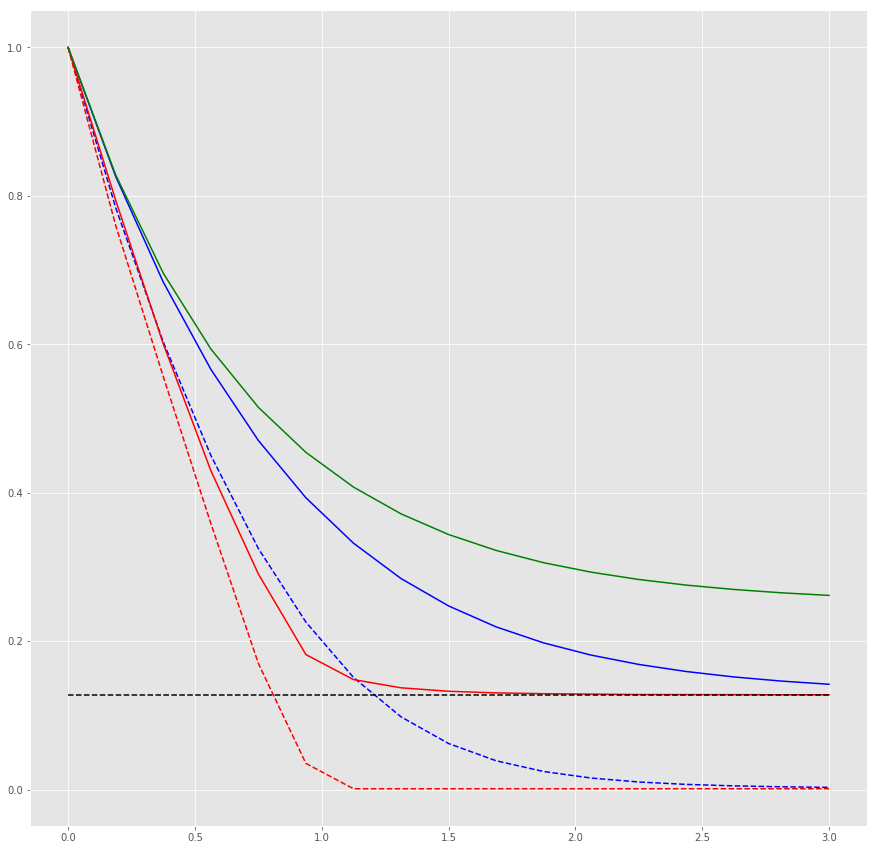

In [41]:
#plot for a specific SNR vs rate R
snr = 3

Drsc = interp2d(RR,SS, DDrsc, bounds_error=False)(RR,snr)
Dinf = interp2d(RR,SS, DDrsc, bounds_error=False)(RR,12)
Dind = interp2d(RR,SS, DDind, bounds_error=False)(RR,snr)
Dshn = interp2d(RR,SS, DDind, bounds_error=False)(RR,12)

mmse = Dind[-1]
eta = (1-2**(-2*RR)) / (1 + snr * 2 ** (-2*RR))
Dg = 1 / (1 + snr * eta) 

plt.plot(RR,Drsc,'b')
plt.plot(RR,Dinf,'--b')
plt.plot(RR,Dind,'r')
plt.plot(RR,Dshn,'--r')
plt.plot(RR,Dg,'g')
plt.plot(RR,mmse * np.ones_like(RR),'--k')


In [15]:
#save to file
res = pd.DataFrame({'R' : RR, 'Dshn' : Dshn, 'Dind' : Dind, 'Drsc' : Drsc,
                   'Dinf' : Dinf, 'mmse' : np.ones_like(RR)*mmse } )
res
res.to_csv('../PlotData/noisy_BPSK_RD.csv')

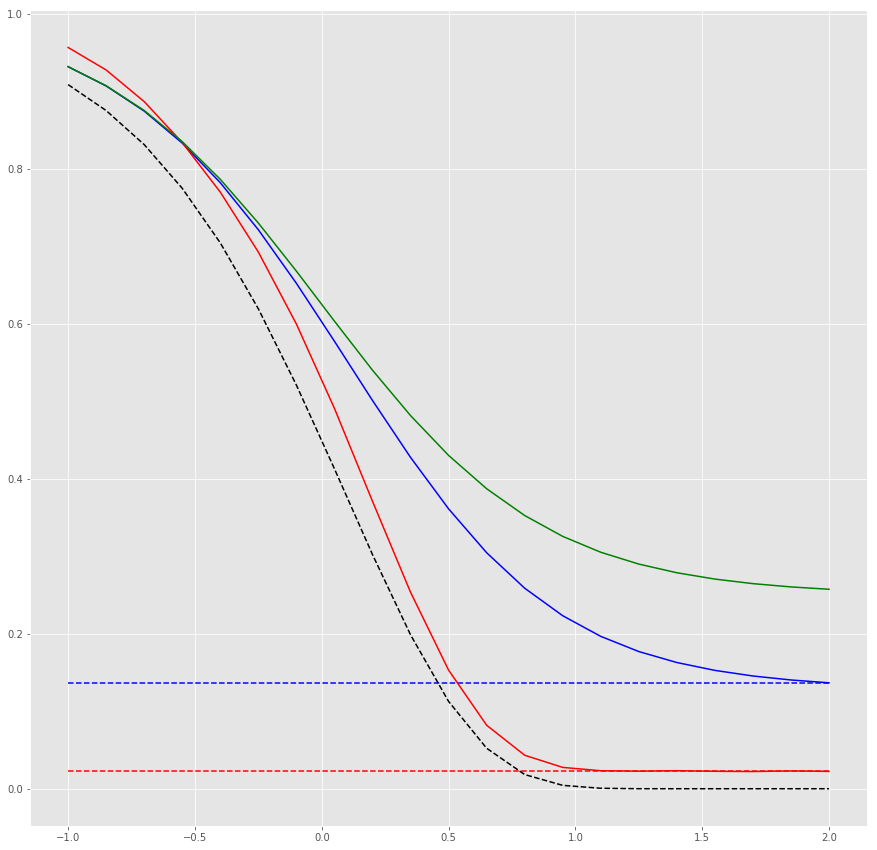

In [42]:
#plot for a specific rate vs SNR
R = 1
Drsc = interp2d(RR,SS, DDrsc, bounds_error=False)(R,SS)

Dinf = interp2d(RR,SS, DDrsc, bounds_error=False)(R,SS.max())[0] * np.ones_like(Drsc)

Dind = interp2d(RR,SS, DDind, bounds_error=False)(R,SS)

Dshn = interp2d(RR,SS, DDind, bounds_error=False)(R,SS.max())[0] * np.ones_like(Drsc)

eta = (1-2**(-2*R)) / (1 + SS * 2 ** (-2*R))
Dg = 1 / (1 + SS * eta) 

plt.plot(np.log10(SS),Drsc,'b')
plt.plot(np.log10(SS),Dinf,'--b')
plt.plot(np.log10(SS),Dind,'r')
plt.plot(np.log10(SS),Dshn,'--r')
plt.plot(np.log10(SS),Dg,'g')
mmse = np.array([BPSK.MMSE_formula(s) for s in SS])

plt.plot(np.log10(SS),mmse,'--k')

In [43]:
#save to file
res =pd.DataFrame({'snr' : SS, 'Dshn' : Dshn[:,0], 'Dind' : Dind[:,0], 'Drsc' : Drsc[:,0],
                   'Dinf' : Dinf[:,0], 'mmse' : mmse } )
res
res.to_csv('../PlotData/noisy_BPSK_SD.csv')